# car price prediction

In [2]:
from IPython.display import Image
Image(url='https://miro.medium.com/v2/resize:fit:1200/0*Y7SWB-YvdAfsAUYZ.png')


# Table of Contents
- [1. Project Overview](#1-project-overview)
  - [1.1 Introduction](#11-introduction)
  - [1.2 Problem Statement](#12-problem-statement)
  - [1.3 Objectives](#13-objectives)
- [2. Importing Packages](#2-importing-packages)
- [3. Loading Data](#3-loading-data)
- [4. Data Cleaning](#4-data-cleaning)
- [5. Exploratory Data Analysis (EDA)](#5-exploratory-data-analysis-eda)
- [6. Regression](#5-regression)
- [7. Conclusion](#6-conclusion)

### 1. Project Overview

##### 1.1 Introduction

The automobile industry is one of the most significant contributors to the global economy. With the surge in demand for both new and used cars, understanding the factors that determine car prices is essential for consumers, manufacturers, and resellers. Predicting car prices accurately can help customers make informed purchase decisions, aid manufacturers in pricing strategies, and assist resellers in maximizing profits.

This project aims to use data science techniques to analyze car attributes and build a machine learning model capable of predicting car prices. The project will also uncover insights into how various features, such as mileage, age, and horsepower, influence car value.

##### 1.2 Problem Statement

The car market is highly dynamic, with prices influenced by numerous factors like make, model, age, mileage, and features. Traditional methods of determining car prices often rely on manual appraisals, which can be subjective and inconsistent.

This creates a need for a data-driven approach to predict car prices accurately. The challenge is to build a model that can:

- Handle the diversity of car features.
- Account for non-linear relationships between features and prices.
- Provide explainable predictions for better decision-making.

##### 1.3 Objectives

1. Develop a Machine Learning Model:

- Build and evaluate a regression model to predict car prices based on their features.
2. Feature Analysis:

- Identify and quantify the influence of various features (e.g., brand, age, mileage, and horsepower) on car prices.
3. Provide Insights:

- Offer actionable insights for buyers, sellers, and manufacturers based on the model's output and feature importance.


### 2. Importing Packages

To carry out data cleaning, manipulation, and visualization, we’ll use the following Python libraries:

- pandas: Provides data structures and functions needed to efficiently clean and manipulate the dataset.
- numpy: Adds support for numerical operations, including handling arrays and mathematical functions for outlier treatment.
- matplotlib and seaborn: Libraries for data visualization. matplotlib is a core plotting library, while seaborn builds on it to provide more aesthetic and statistical visualizations.

In [13]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### 3. Loading Data

The data used for this project was located in the car_prediction_data.csv file. To better manipulate and analyse the car_prediction_data.csv file, it was loaded into a Pandas Data Frame using the Pandas function, .read_csv().

In [16]:
# loading dataset
df = pd.read_csv("car_prediction_data.csv", index_col=False)

In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Check the DataFrame to see if it loaded correctly.

In [19]:
# Displays the number of rows and columns
df.shape

(301, 9)

Results : The dataset consists of 301 rows (observations) and 9 columns (features).

In [21]:
## Display summary information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 4. Data Cleaning

4.1 Handle Missing Values

In [25]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Our dataset has no missing values

4.2 Remove Duplicates

In [28]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

Check for duplicates

In [30]:
df.drop_duplicates(inplace=True)

Remove duplicates

### 5. Exploratory Data Analysis (EDA)

#### 5.1 Selling Price Distribution

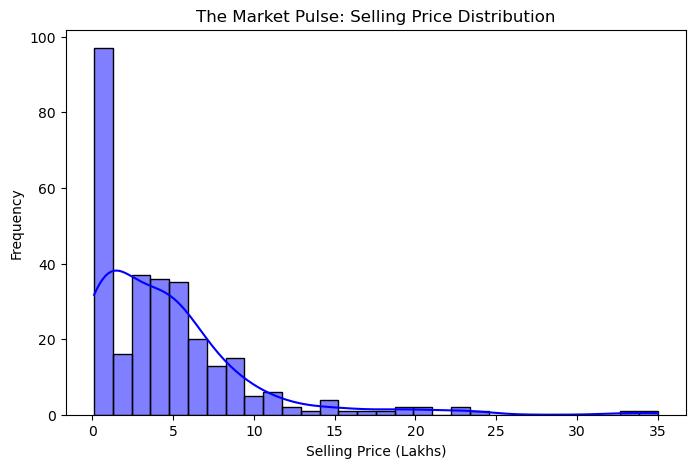

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.title('The Market Pulse: Selling Price Distribution')
plt.xlabel('Selling Price (Lakhs)')
plt.ylabel('Frequency')
plt.show()

#### 5.2 Present Price vs Selling Price

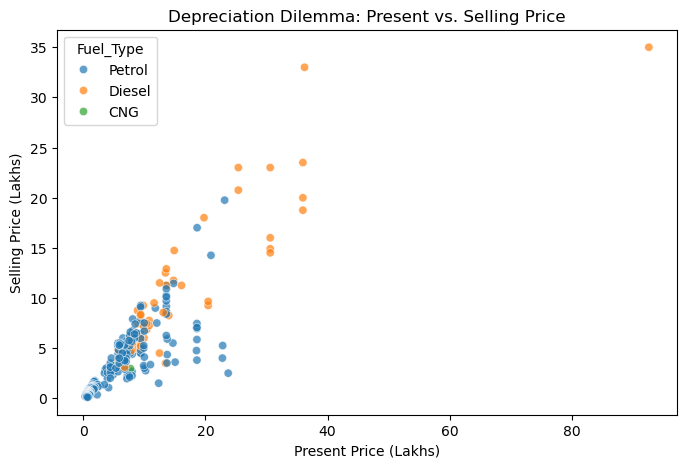

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'], hue=df['Fuel_Type'], alpha=0.7)
plt.title('Depreciation Dilemma: Present vs. Selling Price')
plt.xlabel('Present Price (Lakhs)')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

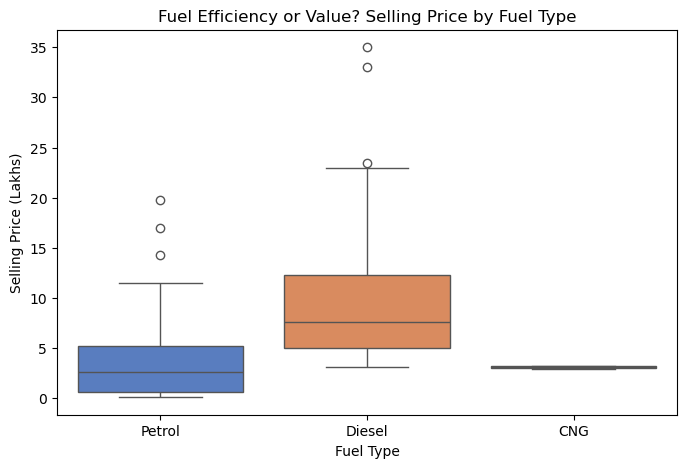

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fuel_Type'], y=df['Selling_Price'], palette='muted')
plt.title('Fuel Efficiency or Value? Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

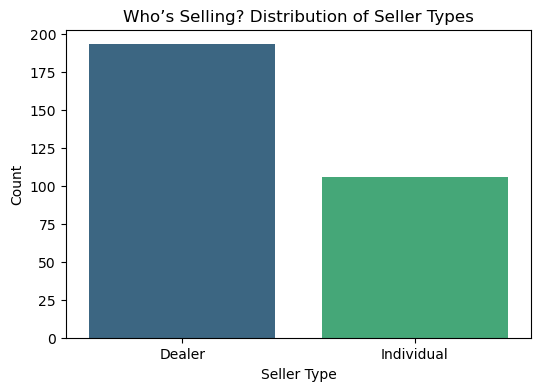

In [40]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Seller_Type'], palette='viridis')
plt.title('Who’s Selling? Distribution of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

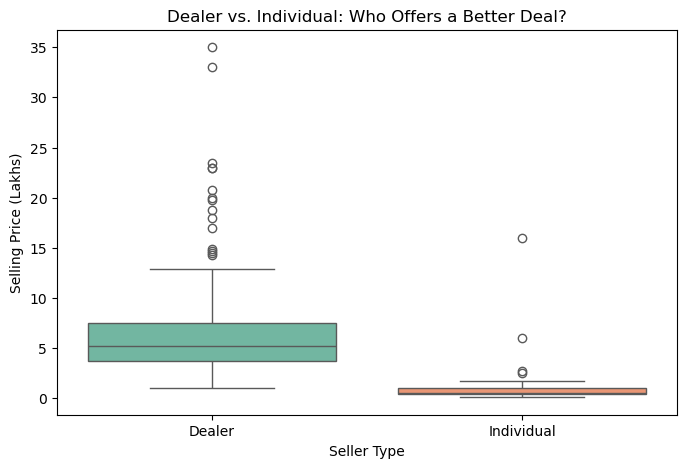

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Seller_Type'], y=df['Selling_Price'], palette='Set2')
plt.title('Dealer vs. Individual: Who Offers a Better Deal?')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

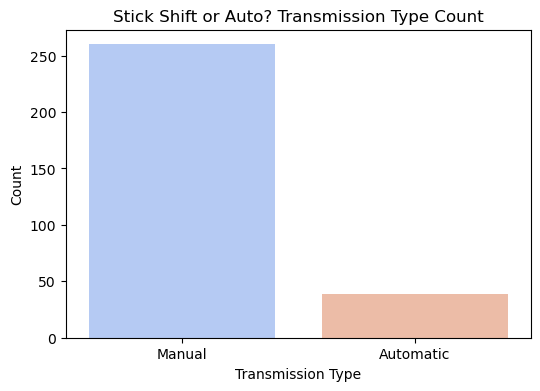

In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Transmission'], palette='coolwarm')
plt.title('Stick Shift or Auto? Transmission Type Count')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

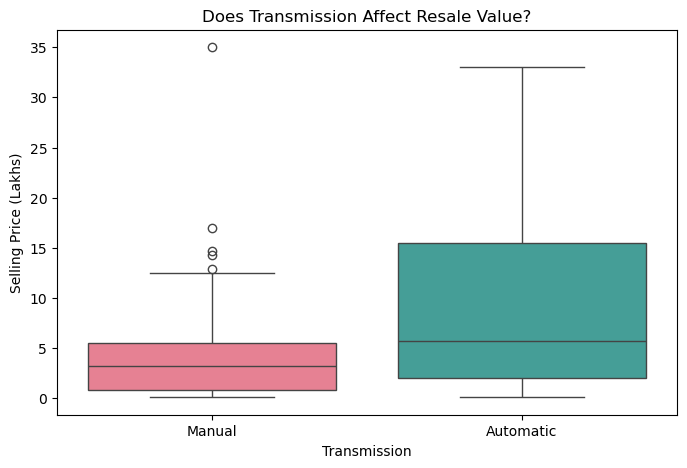

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Transmission'], y=df['Selling_Price'], palette='husl')
plt.title('Does Transmission Affect Resale Value?')
plt.xlabel('Transmission')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

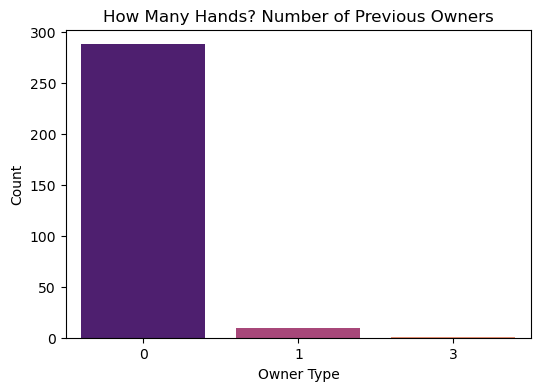

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Owner'], palette='magma')
plt.title('How Many Hands? Number of Previous Owners')
plt.xlabel('Owner Type')
plt.ylabel('Count')
plt.show()

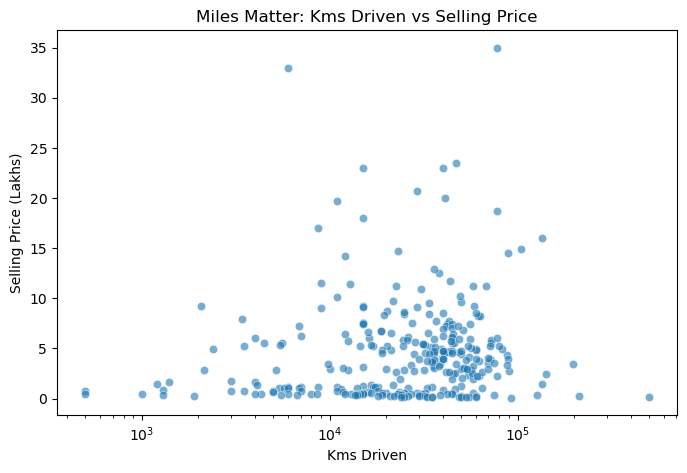

In [50]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Kms_Driven'], y=df['Selling_Price'], alpha=0.6)
plt.title('Miles Matter: Kms Driven vs Selling Price')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price (Lakhs)')
plt.xscale('log')
plt.show()

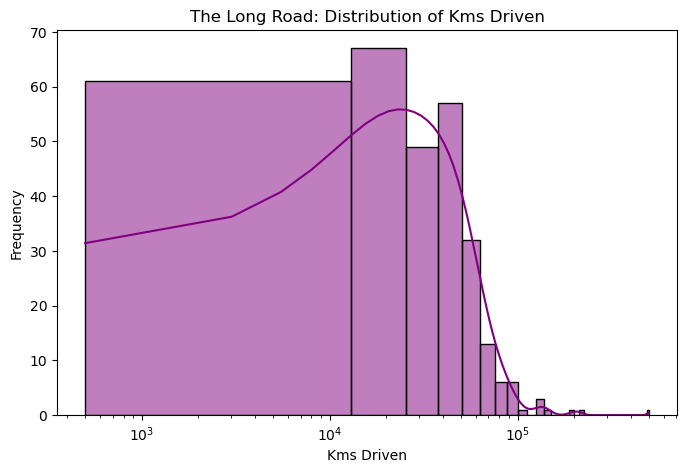

In [52]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Kms_Driven'], bins=40, kde=True, color='purple')
plt.title('The Long Road: Distribution of Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

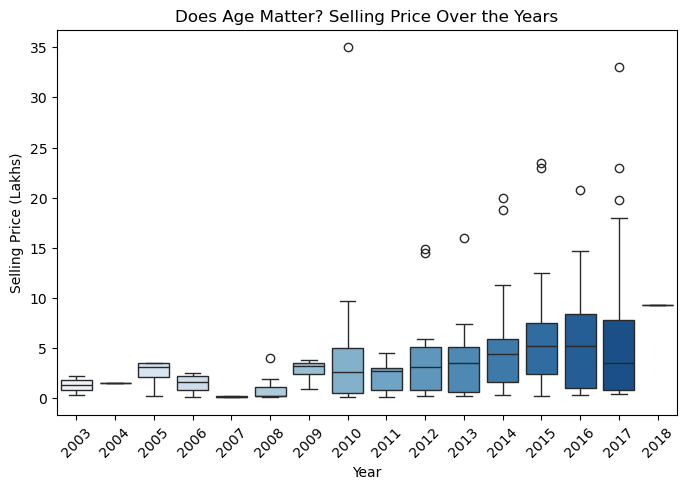

In [54]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Year'], y=df['Selling_Price'], palette='Blues')
plt.xticks(rotation=45)
plt.title('Does Age Matter? Selling Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Selling Price (Lakhs)')
plt.show()

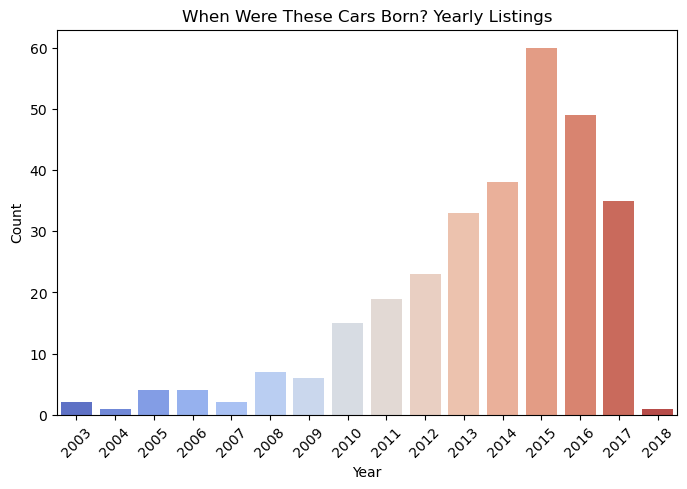

In [56]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Year'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('When Were These Cars Born? Yearly Listings')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

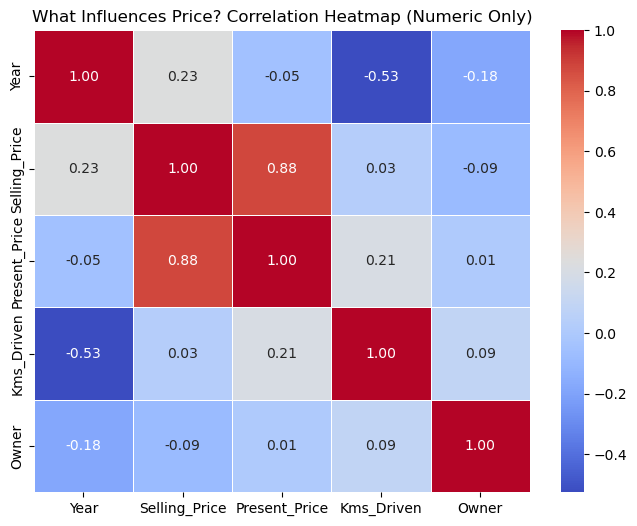

In [58]:
plt.figure(figsize=(8, 6))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('What Influences Price? Correlation Heatmap (Numeric Only)')
plt.show()

### 6.Regression


### 7. Conclusion
